In [89]:
import pandas as pd

df=pd.read_csv('..\\data\\fraud.csv', index_col = 0)

# Check your data and define X and y : What is X and what is y? 
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values
df[['Class']].value_counts()

Class
0        21337
1          356
Name: count, dtype: int64

In [90]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)
# check the number of rows in the training and testing data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13015, 29) (13015,)
(8678, 29) (8678,)


In [91]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------## 
#--------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()),         
         ('knn', KNeighborsClassifier(n_neighbors = 5))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

[[8538    3]
 [  28  109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.97      0.80      0.88       137

    accuracy                           1.00      8678
   macro avg       0.98      0.90      0.94      8678
weighted avg       1.00      1.00      1.00      8678

0.9186226676477651


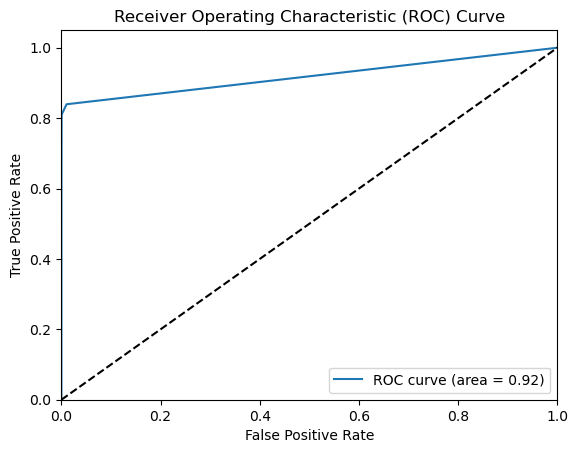

In [92]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)


fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [93]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[12793     3]
 [   39   180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.98      0.82      0.90       219

    accuracy                           1.00     13015
   macro avg       0.99      0.91      0.95     13015
weighted avg       1.00      1.00      1.00     13015

0.9992349207300798


In [94]:
import pandas as pd

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df

,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000117,0.613139,1.0
2,0.000351,0.773723,0.8
3,0.000351,0.795620,0.6
4,0.000585,0.810219,0.4
5,0.010420,0.839416,0.2
6,1.000000,1.000000,0.0
